## Problem 1: Set up Github and clone assignment repo. 


- Go to http://www.github.com and create an account.
- Send your Github username to dg2991@columbia.edu.
- Install Git - https://github.com/blog/1510-installing-git-from-github-for-mac. Make sure to install command line tools. 
- When I have received your email, you should get a confirmation that you have been added to the repo.
- Click on this link: https://classroom.github.com/assignment-invitations/11415026d0459793405d3c1ff95cc259
- Follow the instructions to clone that repo to your local machine.
- You should type a command like: 

```$ git clone https://github.com/Columbia-Intro-Data-Science/python-introduction-(your-github-username).git```


**Next:** Solve the problems directly in this notebook, and then push to the repo above (not to the course repo!)


The process should be to create a copy of this notebook, move it into the folder you created above. Then do this:

``` $ git add mynotebooksolutions.ipynb ```

``` $ git commit -m "added my homework" ```

``` $ git push origin master $ ```


## Problem 2: Sales Data Analysis

In [1]:
# read data into a DataFrame
import pandas as pd
import pylab as plt
import numpy as np
import seaborn
from sklearn.linear_model import LinearRegression
import numpy.random as nprnd
import random
import json
pd.set_option('display.max_columns', 500)
%matplotlib inline

df = pd.read_csv('http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv', index_col=0)
df.head()

/Users/liang/anaconda/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9



#### What are the features?

- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

#### Goal: Predict the number of sales in a given market based on the advertising in TV, Radio and Newspaper.


### Problem 2, Part 0: Plot box plots of the coefficient ranges

Use df.boxplot()

{'boxes': [<matplotlib.lines.Line2D at 0x11bf5f810>,
 'caps': [<matplotlib.lines.Line2D at 0x11bf7b6d0>,
 'fliers': [<matplotlib.lines.Line2D at 0x11bf849d0>,
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x11bf84390>,
 'whiskers': [<matplotlib.lines.Line2D at 0x119a3b050>,
  <matplotlib.lines.Line2D at 0x11bf13d90>]}

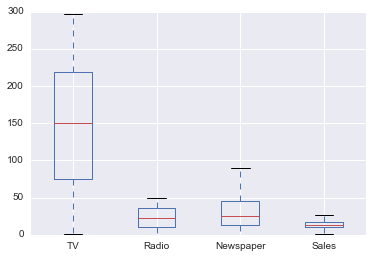

In [2]:
df.boxplot(return_type='dict')

### Problem 2, Part 1: Create scatter plots using plt.scatter() 

Create scatter plots of the advertising dollars spent on TV, Radio and Newspaper to the total Sales dollars gained. Fill in the parameter for scatter() below, and simply 

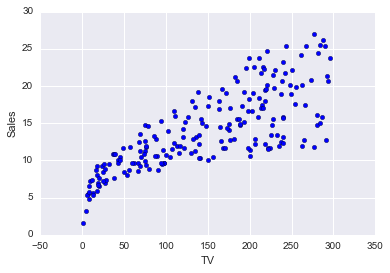

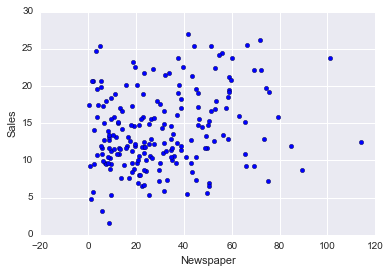

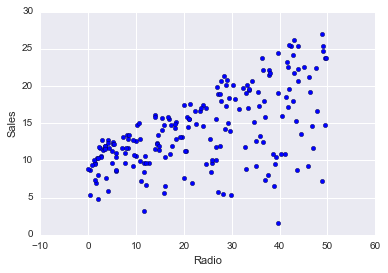

In [3]:
fig = plt.figure()
plt.scatter(df['TV'],df['Sales'])
plt.xlabel('TV')
plt.ylabel('Sales')
axes = fig.add_subplot(1, 1, 1)

fig = plt.figure()
plt.scatter(df['Newspaper'],df['Sales'])
plt.xlabel('Newspaper')
plt.ylabel('Sales')
axes = fig.add_subplot(1, 1, 1)

fig = plt.figure()
plt.scatter(df['Radio'],df['Sales'])
plt.xlabel('Radio')
plt.ylabel('Sales')
axes = fig.add_subplot(1, 1, 1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x11c113450>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x11d491890>]], dtype=object)

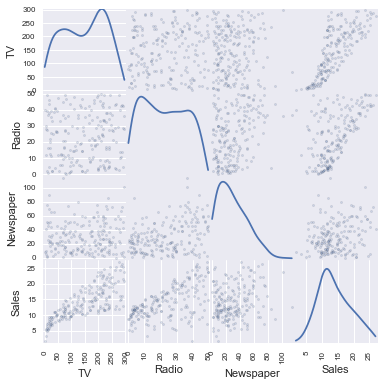

In [4]:
from pandas.tools.plotting import scatter_matrix 
scatter_matrix(df, alpha=0.2, figsize=(6, 6), diagonal='kde')

Which of the variables seem correlated with one another? Which don't? Explain your answer

**Answer**

Sales correlated with TV; Sales correlated with Radio. For both of them, sales goes up as advertising dollars spent on TV or Radio goes up.

Sales doesn't correlated with Newspaper, because there is no sign that shows sales changes with advertising dollars spent on Newspaper changes.

**End**

### Probelm 2, Part 2: Predict sales using sklearn

- Split data into training and testing subsets.
- Train model using LinearRegression() from sklearn.linear_model on training data.
- Evaluate using RMSE and R^2 on testing set


If you need help, please refer to this example:

https://github.com/Columbia-Intro-Data-Science/APMAE4990-/blob/master/notebooks/Lecture%202%20-%20Regression%20Bookingdotcom%20Case%20Study.ipynb

See where I split the data into testing/training and evalaute performance. 

In [5]:
from sklearn.linear_model import LinearRegression

a) Set y to be the sales in df

In [6]:
y = df['Sales']

b) Set X to be just the features described above in df

In [7]:
X = df[['TV', 'Radio', 'Newspaper']]

c) Randomly split data into training and testing - 80% training, 20% testing.

In [8]:
# Split the data into training/testing sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8)
n_samples, n_features = X.shape

d) Train model on training data, and make predictions on testing data

In [9]:
# Create linear regression object
regr = LinearRegression()

# Train the model using the training sets
regr.fit(X_train, y_train)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(X_test, y_test))

('Coefficients: \n', array([ 0.04599525,  0.18121137,  0.00265695]))
Residual sum of squares: 3.60
Variance score: 0.84


e) Evalute the R^2 on training data. Is this good? Bad? Why?

In [10]:
print('R^2: %.2f' % regr.score(X_test, y_test))

R^2: 0.84


f) Make a scatter plot of your predictions vs the actual values on the testing data. Does it look like a good model?

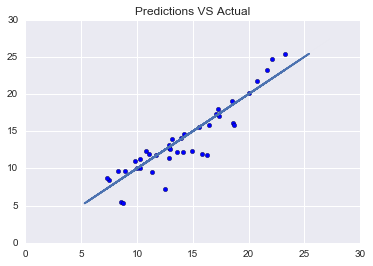

In [11]:
#plt.figure(figsize=(10,10))
plt.title('Predictions VS Actual')
plt.scatter(regr.predict(X_test),y_test)
plt.plot(y_test,y_test)

**Answer**

It looks like a good linear regression model since the line goes through these points.

**End**

g) Can you measure the importance of features in this model? What is something you should check before making conclusions?

Try looking at LinearRegression().coef_

In [12]:
print ('the importance of TV is %s' %regr.coef_[0])
print ('the importance of Radio is %s' %regr.coef_[1])
print ('the importance of Newspaper is %s' %regr.coef_[2])

the importance of TV is 0.0459952520321
the importance of Radio is 0.18121136809
the importance of Newspaper is 0.00265695348897


**Answer**

By using LinearRegression().coef_ function, we can measure the importance of features in this model. As the results shown above.

The thing that we should check before conclusions is wether they are correlated.

**End**

h) What can you conclude from g) - can you think of a way to interpret the result? What should we have done to measure the importance of the features involved?

**Answer**

The importance of Radio is the biggest, which means that every dollar we spend on Radio can give us the maximum sale compare with TV and Newspaper. We used coefficience to measure the importance of the features involved.

**End**

## How could you have improved performance?

*Hint:* Try plotting the data in three dimensions along with the hyperplane solution, and see if you can infer
a new variable which will help, or try a nonlinear/non-parametric model

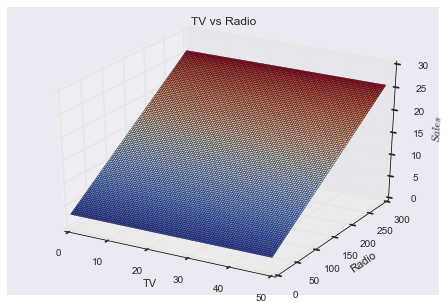

In [13]:
from mpl_toolkits.mplot3d import Axes3D

predict = lambda x, y: regr.coef_[0] * x + regr.coef_[1] * y + regr.intercept_

#define space
tv = np.linspace(df.TV.min(), df.TV.max(), 100)
radio = np.linspace(df.Radio.min(), df.Radio.max(), 100)
TV, Radio = np.meshgrid(tv, radio)

#plot
fig = plt.figure()
axes = Axes3D(fig)
surf = axes.plot_surface(Radio, TV, predict(tv, radio), rstride=1, cstride=1, cmap='coolwarm')
axes.set_xlabel('TV')
axes.set_ylabel('Radio')
axes.set_zlabel('$Sales$')
axes.set_title('TV vs Radio')
plt.show()


## Problem 3:  Gradient Descent and the learning rate

By modifying the learning rate below, show how the convergence takes longer or doesn't converge at all.
Can you explain in words or math why this is?

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 100 iterations b = 4.93121176653, m = 1.3825706406, error = 110.610846134


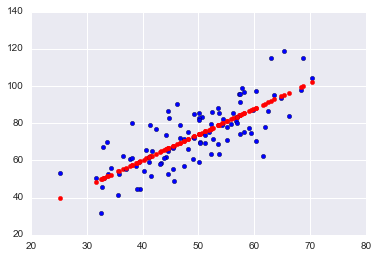

In [14]:
from numpy import *

# y = mx + b
# m is slope, b is y-intercept
def compute_error_for_line_given_points(b, m, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (m * x + b)) ** 2
    return totalError / float(len(points))

def step_gradient(b_current, m_current, points, learningRate):
    b_gradient = 0
    m_gradient = 0
    N = float(len(points))
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        b_gradient += -(2/N) * (y - ((m_current * x) + b_current))
        m_gradient += -(2/N) * x * (y - ((m_current * x) + b_current))
    new_b = b_current - (learningRate * b_gradient)
    new_m = m_current - (learningRate * m_gradient)
    return [new_b, new_m]

def gradient_descent_runner(points, starting_b, starting_m, learning_rate, num_iterations):
    b = starting_b
    m = starting_m
    for i in range(num_iterations):
        b, m = step_gradient(b, m, array(points), learning_rate)
    return [b, m]

def run(num_iterations):
    #points = genfromtxt("http://www-bcf.usc.edu/~gareth/ISL/Advertising.csv", delimiter=",")
    points = genfromtxt("../APMAE4990--master/data/data.csv", delimiter=",")
    learning_rate = 0.0001
    initial_b = 5 # initial y-intercept guess
    initial_m = 5 # initial slope guess
    num_iterations = num_iterations
    print "Starting gradient descent at b = {0}, m = {1}, error = {2}".format(initial_b, initial_m, compute_error_for_line_given_points(initial_b, initial_m, points))
    print "Running..."
    [b, m] = gradient_descent_runner(points, initial_b, initial_m, learning_rate, num_iterations)
    print "After {0} iterations b = {1}, m = {2}, error = {3}".format(num_iterations, b, m, compute_error_for_line_given_points(b, m, points))
    for i in range(0,len(points)):
        plt.scatter(points[i,0],points[i,1])
        plt.scatter(points[i,0],m*points[i,0]+b,color='r')

run(100)

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 0 iterations b = 5, m = 5, error = 32731.1892611


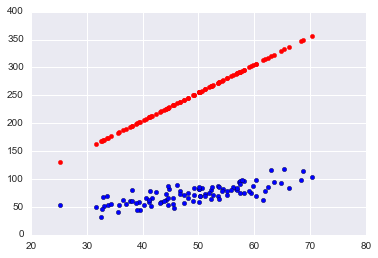

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 1 iterations b = 4.96458866865, m = 3.19715076682, error = 8318.53330275


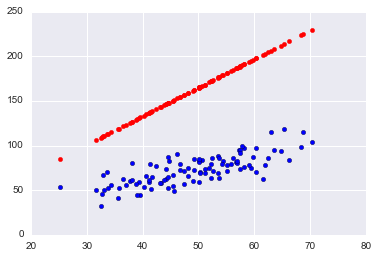

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 2 iterations b = 4.94683732124, m = 2.29281376357, error = 2175.87160551


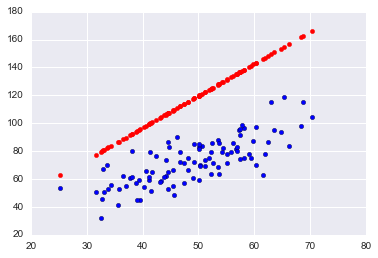

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 3 iterations b = 4.93794449205, m = 1.83918425101, error = 630.267847192


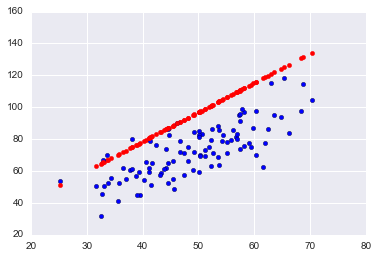

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 4 iterations b = 4.93349523115, m = 1.61163651609, error = 241.366241689


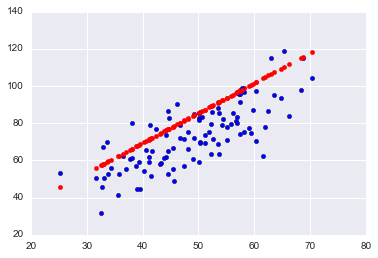

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 5 iterations b = 4.93127493204, m = 1.49749486213, error = 143.511624958


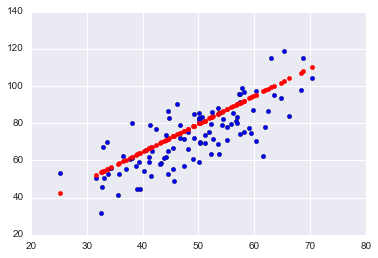

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 6 iterations b = 4.93017271421, m = 1.44023943461, error = 118.889645918


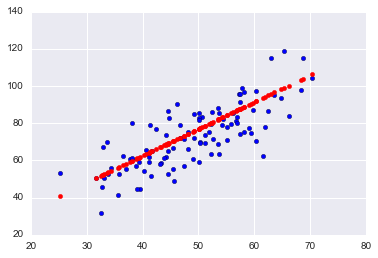

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 7 iterations b = 4.92963134297, m = 1.41151900921, error = 112.694310788


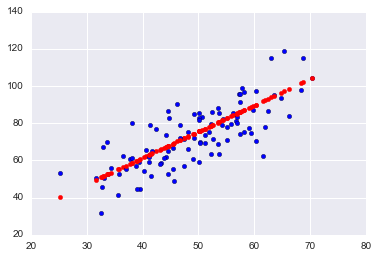

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 8 iterations b = 4.92937130089, m = 1.39711217774, error = 111.135449455


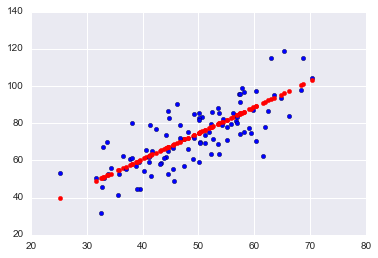

Starting gradient descent at b = 5, m = 5, error = 32731.1892611
Running...
After 9 iterations b = 4.92925237773, m = 1.38988526412, error = 110.743208012


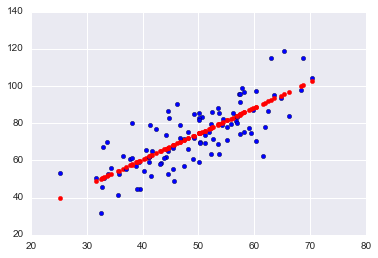

In [15]:
# Use this to visually discuss convergence rate based on learning rate

for num in range(0,10):
   run(num)
   plt.show()


## Problem 3 Part 2

Plot the error as a function of the number of iterations for various learning rates. Choose the rates
so that it tells a story.